In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
print(tf.__version__)

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2.3.1


### ***Activations and Initializers***

In [4]:
def logit(z):
    return 1/(1+np.exp(-z))
logit(3)

0.9525741268224334

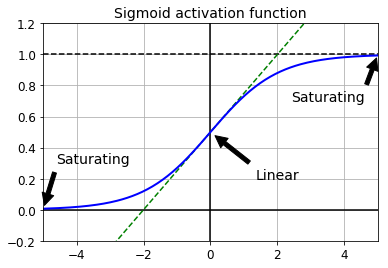

In [12]:
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [14]:
keras.initializers

<module 'tensorflow.keras.initializers' from '/Users/cmeena/.local/lib/python3.6/site-packages/tensorflow/keras/initializers/__init__.py'>

In [19]:
[item for item in dir(keras.initializers) if not item.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [20]:
keras.layers.Dense(10, activation = "relu", kernel_initializer = "he_normal")

In [22]:
he_avg_init = keras.initializers.VarianceScaling(scale = 2., mode = 'fan_avg', distribution = 'uniform')
keras.layers.Dense(10, activation = "relu", kernel_initializer = he_avg_init)

In [23]:
def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

print(relu(-2), leaky_relu(-2))

0 -0.02


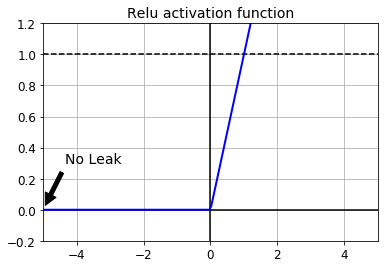

In [50]:
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
# plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, relu(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('No Leak', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
# plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Relu activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

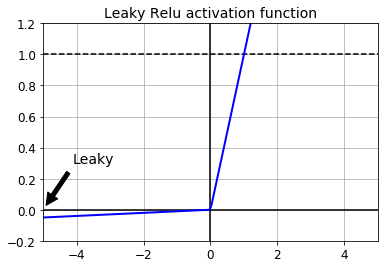

In [42]:
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
# plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, leaky_relu(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Leaky', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
# plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Leaky Relu activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [35]:
[item for item in dir(keras.activations) if not item.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [43]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
elu(-5)

array(-0.99326205)

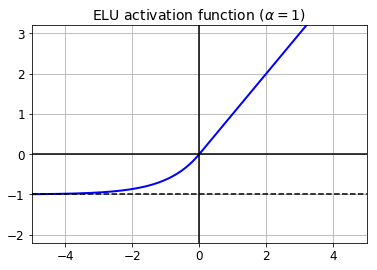

In [46]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [49]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

Fashion MNIST Prediction with Leaky Relu

In [59]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full, X_test = X_train_full/255., X_test/255.
X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

In [60]:
tf.random.set_seed(42)
np.random.seed(42)

**Leaky ReLU**

In [74]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3122 - accuracy: 0.6186 - val_loss: 0.9047 - val_accuracy: 0.7158
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8059 - accuracy: 0.7345 - val_loss: 0.7203 - val_accuracy: 0.7636
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6870 - accuracy: 0.7706 - val_loss: 0.6474 - val_accuracy: 0.7886
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6249 - accuracy: 0.7932 - val_loss: 0.5924 - val_accuracy: 0.8072
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5850 - accuracy: 0.8067 - val_loss: 0.5597 - val_accuracy: 0.8194
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5564 - accuracy: 0.8153 - val_loss: 0.5362 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5347 - accuracy: 0.8219 - val_loss: 0.5166 - val_accuracy:

In [76]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.8244


[0.5147978067398071, 0.824400007724762]

**PReLU**

In [66]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [68]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr = 1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6564 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8050
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

In [69]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.8241


[0.5144063234329224, 0.8241000175476074]

**SeLU**

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = "selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation = "selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [71]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr = 1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.9918 - accuracy: 0.6869 - val_loss: 0.7056 - val_accuracy: 0.7708
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6504 - accuracy: 0.7836 - val_loss: 0.5943 - val_accuracy: 0.8060
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5745 - accuracy: 0.8076 - val_loss: 0.5493 - val_accuracy: 0.8162
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5341 - accuracy: 0.8193 - val_loss: 0.5116 - val_accuracy: 0.8324
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5086 - accuracy: 0.8267 - val_loss: 0.4909 - val_accuracy: 0.8384
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4901 - accuracy: 0.8309 - val_loss: 0.4753 - val_accuracy: 0.8404
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4761 - accuracy: 0.8346 - val_loss: 0.4631 - val_accuracy:

In [73]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8330


[0.4758436381816864, 0.8330000042915344]

### ***Batch Normalization***

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full, X_test = X_train_full/255., X_test/255.
X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

tf.random.set_seed(42)
np.random.seed(42)

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation = "elu", kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = "elu", kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = "softmax")
])

In [5]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.SGD(1e-1), metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4787 - accuracy: 0.8276 - val_loss: 0.3767 - val_accuracy: 0.8626
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3715 - accuracy: 0.8639 - val_loss: 0.3274 - val_accuracy: 0.8828
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8741 - val_loss: 0.3530 - val_accuracy: 0.8698
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3093 - accuracy: 0.8843 - val_loss: 0.3136 - val_accuracy: 0.8868
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2907 - accuracy: 0.8909 - val_loss: 0.2952 - val_accuracy: 0.8922
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2743 - accuracy: 0.8986 - val_loss: 0.2948 - val_accuracy: 0.8916
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2629 - accuracy: 0.9023 - val_loss: 0.3099 - val_accuracy

In [6]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8905


[0.3263475000858307, 0.890500009059906]

In [7]:
model.summary()
history.params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

{'epochs': 10, 'steps': 1719, 'verbose': 1}

In [10]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [16]:
# adding BN layers before applying activation function

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer = "he_normal", use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer = "he_normal", use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [20]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.SGD(lr = 1e-1), metrics = ["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4869 - accuracy: 0.8255 - val_loss: 0.3895 - val_accuracy: 0.8610
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3872 - accuracy: 0.8575 - val_loss: 0.3423 - val_accuracy: 0.8758
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3534 - accuracy: 0.8696 - val_loss: 0.3634 - val_accuracy: 0.8668
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3262 - accuracy: 0.8796 - val_loss: 0.3258 - val_accuracy: 0.8800
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3102 - accuracy: 0.8854 - val_loss: 0.3060 - val_accuracy: 0.8880
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.8914 - val_loss: 0.3177 - val_accuracy: 0.8852
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2847 - accuracy: 0.8955 - val_loss: 0.3278 - val_accuracy:

In [22]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8866


[0.33580565452575684, 0.8866000175476074]

In [23]:
model.summary()
history.params

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 300)               1200      
_________________________________________________________________
activation_4 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)              

{'epochs': 10, 'steps': 1719, 'verbose': 1}

***Gradient Clipping***

In [26]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer

In [25]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### ***Reusing Pretrained Layers***

In [107]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_full, X_test = X_train_full/255., X_test/255.
X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

In [26]:
def split_data(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[y_5_or_6], y_B), (X[~y_5_or_6], y_A))

In [44]:
(X_train_B, y_train_B), (X_train_A, y_train_A) = split_data(X_train, y_train)
(X_val_B, y_val_B), (X_val_A, y_val_A) = split_data(X_val, y_val)
(X_test_B, y_test_B), (X_test_A, y_test_A) = split_data(X_test, y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

X_train_A.shape, y_train_A.shape, X_train_B.shape, y_train_B.shape

((43986, 28, 28), (43986,), (200, 28, 28), (200,))

In [45]:
y_train_A[:5]

array([4, 0, 5, 7, 7], dtype=uint8)

In [46]:
y_train_B[:5]

array([1., 1., 0., 0., 0.], dtype=float32)

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [49]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [50]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_val_A, y_val_A))

Epoch 1/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.5926 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8827
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2896 - val_accuracy: 0.9011
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9060 - val_loss: 0.2736 - val_accuracy: 0.9066
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2718 - val_accuracy:

In [51]:
!pwd

/Users/cmeena/Desktop/ML Practice/TensorFlow Developer/Aurelion Book/Ch 11


In [52]:
path_ = '/Users/cmeena/Desktop/ML Practice/TensorFlow Developer/Aurelion Book/Ch 11/'

In [53]:
model_A.save(path_ + "my_model_A.h5")

In [54]:
model_A.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 8)                

In [55]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [56]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [57]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_val_B, y_val_B))

Epoch 1/20
7/7 [==============================] - 0s 29ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [58]:
model_B.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_33 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_34 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_35 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                

In [59]:
model_A = keras.models.load_model(path_ + "my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation = "sigmoid"))

In [60]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [68]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [69]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_val_B, y_val_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_val_B, y_val_B))

Epoch 1/4
7/7 [==============================] - 0s 32ms/step - loss: 0.2991 - accuracy: 0.9150 - val_loss: 0.3251 - val_accuracy: 0.8783
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.2857 - accuracy: 0.9250 - val_loss: 0.3108 - val_accuracy: 0.8874
Epoch 3/4
7/7 [==============================] - 0s 12ms/step - loss: 0.2720 - accuracy: 0.9400 - val_loss: 0.2982 - val_accuracy: 0.8976
Epoch 4/4
7/7 [==============================] - 0s 12ms/step - loss: 0.2601 - accuracy: 0.9450 - val_loss: 0.2868 - val_accuracy: 0.9087
Epoch 1/16
7/7 [==============================] - 0s 57ms/step - loss: 0.2307 - accuracy: 0.9550 - val_loss: 0.2312 - val_accuracy: 0.9422
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.1834 - accuracy: 0.9700 - val_loss: 0.1914 - val_accuracy: 0.9604
Epoch 3/16
7/7 [==============================] - 0s 15ms/step - loss: 0.1494 - accuracy: 0.9800 - val_loss: 0.1646 - val_accuracy: 0.9726
Epoch 4/16
7/7 [===============

In [70]:
model_B_on_A.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_27 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_28 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                

In [71]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [72]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9935


[0.06393454223871231, 0.9934999942779541]

In [74]:
(1-0.9934999942779541)/(1-0.9704999923706055)

0.22033912003362105

### ***Optimizers***

In [75]:
optimizer1 = keras.optimizers.SGD(lr = 1e-2, momentum = 0.9) # Momentum Optimization
optimizer2 = keras.optimizers.SGD(lr = 1e-2, momentum = 0.9, nesterov = True) # Nesterov Accelerated Gradient 
optimizer3 = keras.optimizers.Adagrad(lr = 1e-2) # AdaGrad Optimization
optimizer4 = keras.optimizers.RMSprop(lr = 1e-2, rho = 0.9) # RMSProp Optimization
optimizer5 = keras.optimizers.Adam(lr = 1e-2, beta_1 = 0.9, beta_2 = 0.999)
optimizer6 = keras.optimizers.Nadam(lr = 1e-2, beta_1 = 0.9, beta_2 = 0.999)

### ***Learning Rate Scheduling***

**Power Scheduling**

In [82]:
optimizer = keras.optimizers.SGD(lr = 1e-2, decay = 1e-4)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
n_epochs = 20
history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5881 - accuracy: 0.7972 - val_loss: 0.4668 - val_accuracy: 0.8374
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4518 - accuracy: 0.8395 - val_loss: 0.4150 - val_accuracy: 0.8574
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4215 - accuracy: 0.8502 - val_loss: 0.4654 - val_accuracy: 0.8250
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4037 - accuracy: 0.8569 - val_loss: 0.3953 - val_accuracy: 0.8630
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3919 - accuracy: 0.8619 - val_loss: 0.3838 - val_accuracy: 0.8682
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3806 - accuracy: 0.8654 - val_loss: 0.3794 - val_accuracy: 0.8698
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8683 - val_loss: 0.3740 - val_accuracy:

[0.38701993227005005, 0.8619999885559082]

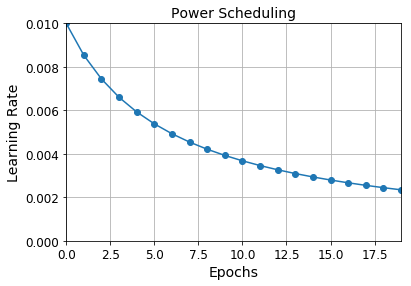

In [83]:
learning_rate = 1e-2
decay = 1e-4
batch_size = 32
epochs = np.arange(n_epochs)
n_steps = len(X_train) // batch_size
lrs = learning_rate / (1 + decay * epochs * n_steps)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize = 14)
plt.grid(True)
plt.show()

**Exponential Scheduling**

In [85]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])
model.evaluate(X_test, y_test)

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7339 - accuracy: 0.7653 - val_loss: 1.0581 - val_accuracy: 0.7052
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5141 - accuracy: 0.8253 - val_loss: 0.4233 - val_accuracy: 0.8570
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4430 - accuracy: 0.8490 - val_loss: 0.5782 - val_accuracy: 0.8206
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4042 - accuracy: 0.8608 - val_loss: 0.3904 - val_accuracy: 0.8758
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3789 - accuracy: 0.8695 - val_loss: 0.3832 - val_accuracy: 0.8752
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3485 - accuracy: 0.8785 - val_loss: 0.3964 - val_accuracy: 0.8760
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3277 - accuracy: 0.8878 - val_loss: 0.3837 - val_accurac

[0.4409589469432831, 0.8901000022888184]

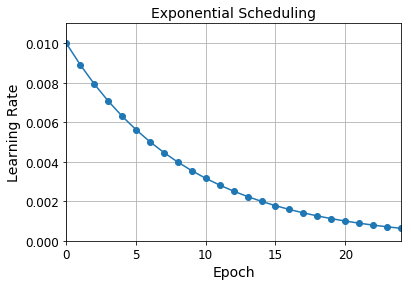

In [86]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Piecewise Scheduling**

In [87]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])
model.evaluate(X_test, y_test)

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7324 - accuracy: 0.7597 - val_loss: 1.1161 - val_accuracy: 0.6886
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5567 - accuracy: 0.8180 - val_loss: 0.4797 - val_accuracy: 0.8490
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4851 - accuracy: 0.8417 - val_loss: 0.8019 - val_accuracy: 0.7576
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4647 - accuracy: 0.8512 - val_loss: 0.4500 - val_accuracy: 0.8636
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4495 - accuracy: 0.8557 - val_loss: 0.4187 - val_accuracy: 0.8716
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3414 - accuracy: 0.8833 - val_loss: 0.3587 - val_accuracy: 0.8838
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3358 - accuracy: 0.8863 - val_loss: 0.3949 - val_accuracy

[0.4119965732097626, 0.8939999938011169]

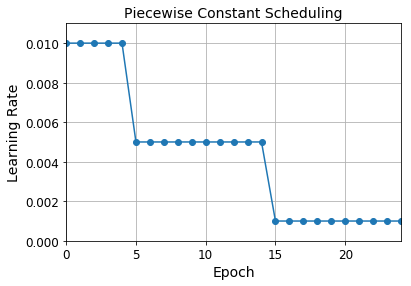

In [89]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

**Performance Scheduling**

In [90]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])
model.evaluate(X_test, y_test)

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5540 - accuracy: 0.8022 - val_loss: 0.4592 - val_accuracy: 0.8386
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4369 - accuracy: 0.8439 - val_loss: 0.4621 - val_accuracy: 0.8378
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8503 - val_loss: 0.3656 - val_accuracy: 0.8632
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3919 - accuracy: 0.8588 - val_loss: 0.3978 - val_accuracy: 0.8608
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3799 - accuracy: 0.8640 - val_loss: 0.3446 - val_accuracy: 0.8736
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3697 - accuracy: 0.8666 - val_loss: 0.3811 - val_accuracy: 0.8746
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3637 - accuracy: 0.8704 - val_loss: 0.3759 - val_accuracy:

[0.35176339745521545, 0.8963000178337097]

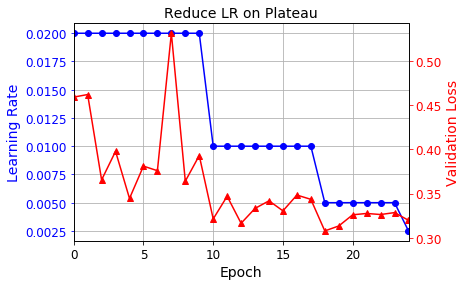

In [91]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

**1Cylce Scheduling**

430/430 [==============================] - 2s 4ms/step - loss: 8028012.0000 - accuracy: 0.3101


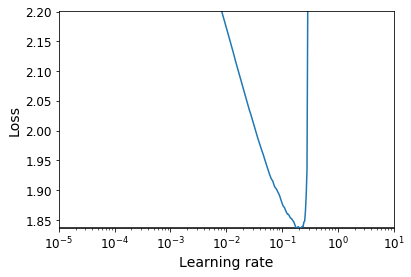

In [92]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [93]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)
        
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[onecycle])
model.evaluate(X_test, y_test)

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.8998 - accuracy: 0.7111 - val_loss: 0.6157 - val_accuracy: 0.7996
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.5613 - accuracy: 0.8109 - val_loss: 0.5023 - val_accuracy: 0.8326
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4920 - accuracy: 0.8274 - val_loss: 0.4841 - val_accuracy: 0.8258
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4595 - accuracy: 0.8369 - val_loss: 0.4545 - val_accuracy: 0.8400
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4451 - accuracy: 0.8426 - val_loss: 0.4349 - val_accuracy: 0.8492
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 0.4291 - accuracy: 0.8465 - val_loss: 0.4139 - val_accuracy: 0.8606
Epoch 7/25
430/430 [==============================] - 3s 6ms/step - loss: 0.4162 - accuracy: 0.8518 - val_loss: 0.4061 - val_accuracy: 0.8592
Epoch 

[0.35717400908470154, 0.8722000122070312]

### ***Overfitting Through Regularization***

**$\ell_1$ and $\ell_2$ Regularization**

In [95]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", 
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/2
1719/1719 [==============================] - 11s 6ms/step - loss: 1.5581 - accuracy: 0.7763 - val_loss: 1.0215 - val_accuracy: 0.7614
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.8829 - accuracy: 0.7997


[0.8829085230827332, 0.7997000217437744]

In [96]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/2
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5976 - accuracy: 0.7781 - val_loss: 1.0108 - val_accuracy: 0.7664
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.8838 - accuracy: 0.8014


[0.8838491439819336, 0.8014000058174133]

**Drop Out**

In [110]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5760 - accuracy: 0.7925 - val_loss: 0.4180 - val_accuracy: 0.8492
Epoch 2/2
313/313 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8517


[0.40259942412376404, 0.8517000079154968]

**Alpha Drop Out**

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0304 - accuracy: 0.6188 - val_loss: 0.8272 - val_accuracy: 0.7188
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.8216 - accuracy: 0.7089


[0.8216037154197693, 0.708899974822998]

**MC Drop Out**

In [111]:
y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [112]:
np.round(model.predict(X_test[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.09, 0.  , 0.89]],
      dtype=float32)

In [113]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.13, 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.06, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.04, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.05, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.1 , 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.08, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.17, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.07, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.12, 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.09, 0.  , 0

In [114]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.81]],
      dtype=float32)

In [115]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.15]],
      dtype=float32)

In [116]:
y_pred = np.argmax(y_proba, axis=1)

In [117]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8513

In [118]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [119]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

mc_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 10)              

In [120]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [121]:
mc_model.set_weights(model.get_weights())

In [123]:
np.round(np.mean([mc_model.predict(X_test[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.09, 0.  , 0.89]],
      dtype=float32)

**Max Norm**

In [99]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)

Epoch 1/2
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5053 - accuracy: 0.8165 - val_loss: 0.4643 - val_accuracy: 0.8344
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8535


[0.3994803726673126, 0.8535000085830688]

### ***Question 8***

In [124]:
data = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 168s 1us/step


In [127]:
(X_train_full, y_train_full), (X_test, y_test) = data

In [128]:
print(X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


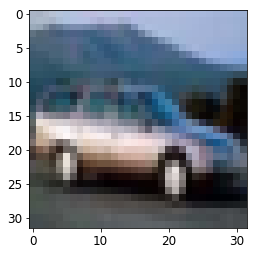

In [136]:
plt.imshow(X_train_full[4], interpolation="nearest")

In [137]:
X_train, X_val = X_train_full[5000:], X_train_full[:5000]
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

A

In [139]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = "elu", kernel_initializer = "he_normal"))
model.add(keras.layers.Dense(10, activation = "softmax"))

optimzer = keras.optimizers.Nadam(lr = 5e-5)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

B

In [141]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = "elu", kernel_initializer = "he_normal"))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation = "softmax"))

optimzer = keras.optimizers.Nadam(lr = 5e-5)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

C

In [142]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = "elu", kernel_initializer = "he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.AlphaDropout(0.3))
model.add(keras.layers.Dense(10, activation = "softmax"))

optimzer = keras.optimizers.Nadam(lr = 5e-5)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])